
<h5 style="text-align: center; color: #BD6C49;"> <i> Ecole Polytechnique de Thiès <br>  Département Génie Informatique et Télécommunication </i> </h5>
<h3 style="text-align: center; color: orange"> Disaster Tweets Detection 🥇 Exploratory Data Analysis </h3>
<h5 style="text-align: center; color: green"> By Kikia DIA 🤝🏾 Mouhamadou Naby DIA 🤝🏾 Ndeye Awa SALANE </h5>

<a id="0"></a> <br>
### Overview
#### [Introduction](#1)
1. [Compréhension des données](#2)
1. [Exploration des données brutes](#3)
1. [Cleaning des données](#4)
1. [Exploration des données clean](#8)
#### [Conclusion](#5)
* <i>[References](#6)</i>
* <i>[Authors](#7)</i>

<a id="1"></a> 
#### Introduction [⏮️]()[👆🏽](#0)[⏭️](#2)

<div style="display: flex;">
     <div style="flex: 1;">
         <img src="https://storage.googleapis.com/kaggle-media/competitions/tweet_screenshot.png" alt="Descriptive Image" style="width: 100%; height:90%;">
     </div>
     <div style="flex: 
         4; padding-y: 10px; padding-left: 10px;">
         <p>
             ♻️ Twitter est devenu un important canal de communication en cas d’urgence.
             <br><br>
             ♻️ L’omniprésence des smartphones permet aux gens d’annoncer une urgence qu’ils observent en temps réel. Pour cette raison, de plus en plus d’organismes s’intéressent à la surveillance programmatique de Twitter (c.-à-d. les organisations de secours aux sinistrés et les agences de presse).
             <br><br>
             ♻️ Mais on ne sait pas toujours si les paroles d’une personne annoncent réellement un désastre (comme en témoigne l'image ci-contre).
             <br><br>
             ♻️ L’auteur utilise explicitement le mot « ABLAZE » (qui veut dire "En Feu") mais le dit métaphoriquement, ce qui est clair pour un homme dès le départ, surtout avec l’aide visuelle. Mais c’est moins clair pour une machine.
             <br><br>
             ♻️ C’est pourquoi nous avons choisis d’utiliser un modèle de langage qui prédit quels Tweets sont sur des catastrophes réelles et lesquels ne le sont pas. Nous allons utiliser à un ensemble de données de 10000 tweets qui ont été classifiés. 
         </p>
     </div>
</div>


In [1]:
# Ajouter le répertoire parent pour les imports de module
import sys
sys.path.append('..')

In [24]:
# Les logs
from src.logging.main import LoggerManager

log = LoggerManager('disaster_tweets_logging.ipynb')

In [3]:
from src.visualization.main import (
  plot_disaster_and_non_disaster_bar_distribution,
  plot_disaster_and_non_disaster_pie_distribution,
  plot_tweet_length_histogram,
  plot_tweet_word_length_histogram,
  plot_average_word_length_for_each_tweet_histogram,
  plot_most_common_stopwords,
  plot_most_common_words,
  plost_most_common_bigrams,
  plost_most_common_trigrams,
  plot_most_common_keywords,
  plot_most_common_locations,
  plot_wordcloud
)

from src.data.make_dataset import get_dataset

from src.utilities.main import (
  remove_emoji,
  remove_html,
  remove_punctuation,
  remove_URL,
  correct_spellings
)

<a id="2"></a> 
#### 1. Compréhension des données [⏮️](#1)[👆🏽](#0)[⏭️](#3)

In [4]:
train, test = get_dataset(raw=True)

♻️ Affichage des trois premières lignes du dataframe pour le train et le test set

♻️ Nous avons 5 colonnes dans le train set
- 🦜 `id`: identifiant du tweet
- 🦜 `keyword`: mot-clé associé au tweet
- 🦜 `location`: la localisation depuis lequel le tweet a été publié
- 🦜 `text`: contenu du tweet
- 🦜 `target`: 0 ou 1 si le tweet est un tweet de catastrophe

In [6]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


♻️ Nous avons 4 colonnes dans le test set
- 🦜 `id`: identifiant du tweet
- 🦜 `keyword`: mot-clé associé au tweet
- 🦜 `location`: la localisation depuis lequel le tweet a été publié
- 🦜 `text`: contenu du tweet
- 🦜 `target`: 0 ou 1 si le tweet est un tweet de catastrophe

In [126]:
test.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


♻️ Nous avons `7613 entrées` dans le train set
  - 🦜 `id`: est de type int
  - 🦜 `keyword`: est de type object (string). Peut-être null (7552 non null sur 7613 soit près `99.19% de valeurs non null`)
  - 🦜 `location`: est de type object (string). Peut-être null (5080 non null sur 7613 soit `66.72% de valeurs non null`)
  - 🦜 `text`: est de type object (string)
  - 🦜 `target`: est de type int (0 ou 1)

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


♻️ Nous avons `3263 entrées` dans le test set
  - 🦜 `id`: est de type int
  - 🦜 `keyword`: est de type object (string)
  - 🦜 `location`: est de type object (string et peut-être null; 2158 non null sur 3263 soit `66.13% de valeurs non null`)
  - 🦜 `text`: est de type object (string)
  - 🦜 `target`: est de type int (0 ou 1)

In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


♻️ Cela nous fait au total 10876 tweets au total

<a id="3"></a> 
#### 2. Exploration des données brutes [⏮️](#2)[👆🏽](#0)[⏭️](#4)

In [7]:
plot_disaster_and_non_disaster_bar_distribution(raw=True)

In [8]:
plot_disaster_and_non_disaster_pie_distribution(raw=True)

♻️ Il y'a plus de tweets qui ne sont pas désastres  que les tweets qui sont désastres 

♻️ Non désastres: `class 0 au total 4342 soit 57%`

♻️ Désastres: `class 1 au total 3271 soit 43%`

In [9]:
plot_tweet_length_histogram(raw=True)

♻️ La distribution des tweets est très similaire. 120 à 140 caractères sont les plus communs.

In [10]:
plot_tweet_word_length_histogram(raw=True)

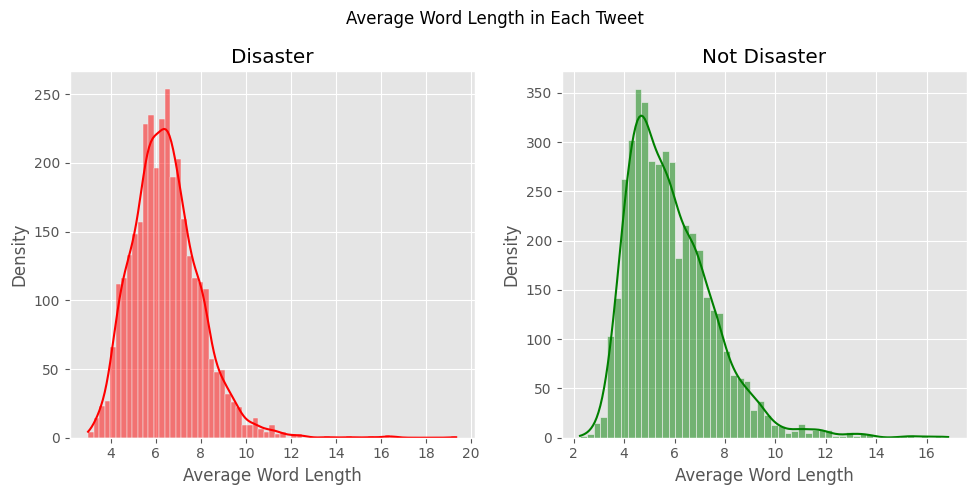

In [11]:
plot_average_word_length_for_each_tweet_histogram(raw=True)

♻️ Stopwords les plus communs dans les tweets

In [12]:
plot_most_common_stopwords(raw=True, top=15)

♻️ Dans les deux cas, le stopword `"the"` domine.

♻️ Dans les tweets de non désastres (class 0), il est suivi par le stopword `"a"`.

♻️ dans les tweets de désastres (class 1), il est suivi du stopword `"in"`.

♻️ Les punctuations dans les tweets

In [13]:
plot_most_common_stopwords(raw=True, top=15)

♻️ Les mots les plus communs

In [14]:
plot_most_common_words(raw=True, top=100)

In [15]:
plost_most_common_bigrams(raw=True, top=15)

In [16]:
plost_most_common_trigrams(raw=True, top=15)

In [17]:
plot_most_common_keywords(raw=True, top=15)

In [18]:
plot_most_common_locations(raw=True, top=15)

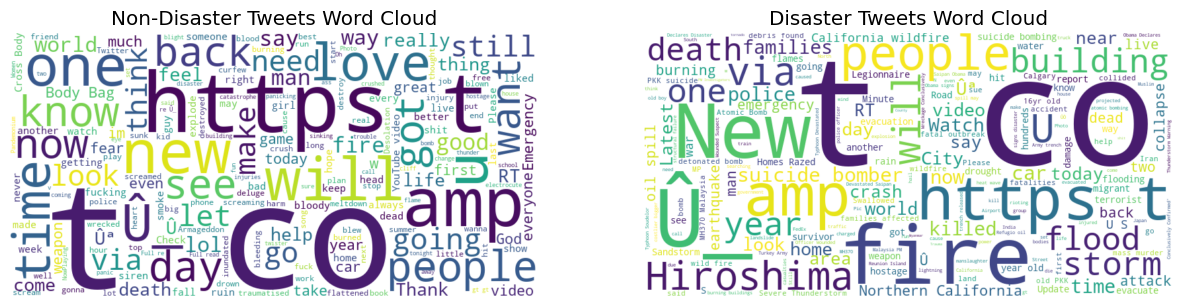

In [19]:
plot_wordcloud(raw=True)

<a id="4"></a> 
#### 3. Cleaning des données [⏮️](#3)[👆🏽](#0)[⏭️](#5)

♻️ Remove URLs

In [25]:
example="New competition launched: https://www.kaggle.com/c/nlp-getting-started"

log.debug(remove_URL(example))

2024-08-03 20:07:18 [debug    ] New competition launched:      filename=disaster_tweets_logging.ipynb hostname=192.168.1.178 ip_address=192.168.1.178


♻️ Remove HTML

In [21]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

log.debug(remove_html(example))

2024-08-03 20:04:25 [debug    ] 
Real or Fake
Kaggle 
getting started
 filename=disaster_tweets_logging.ipynb hostname=192.168.1.178 ip_address=192.168.1.178


♻️ Remove Emoji

In [6]:
log.debug(remove_emoji("Omg another Earthquake 😔😔"))

2024-08-03 15:06:47 [debug    ] Omg another Earthquake         filename=disaster_tweets_logging.ipynb hostname=Mouhamadou-Naby-DIA.local ip_address=127.0.0.1


♻️ Removing punctuations

In [8]:
example="I am a #king"
log.debug(remove_punctuation(example))

2024-08-03 15:07:19 [debug    ] I am a king                    filename=disaster_tweets_logging.ipynb hostname=Mouhamadou-Naby-DIA.local ip_address=127.0.0.1


♻️ Correct Spelling

In [25]:
%%time

text = "corect me plese"
log.debug(correct_spellings(text))

2024-08-03 15:13:56 [debug    ] correct me please              filename=disaster_tweets_logging.ipynb hostname=Mouhamadou-Naby-DIA.local ip_address=127.0.0.1
CPU times: user 1.41 ms, sys: 417 μs, total: 1.82 ms
Wall time: 1.54 ms


In [26]:
%%time

train['text']= train['text'].apply(lambda x : remove_URL(x))
train['text']= train['text'].apply(lambda x : remove_html(x))
train['text']= train['text'].apply(lambda x: remove_emoji(x))
train['text']= train['text'].apply(lambda x : remove_punctuation(x))
#train['text'] = train['text'].apply(lambda x: correct_spellings(x))
#train['keyword'] = train['keyword'].apply(lambda x: correct_spellings(x))
#train['location'] = train['location'].apply(lambda x: correct_spellings(x))
train.to_csv('../data/processed/train.csv', index=False)

CPU times: user 61.3 ms, sys: 4.42 ms, total: 65.7 ms
Wall time: 67.1 ms


In [28]:
%%time

test['text']= test['text'].apply(lambda x : remove_URL(x))
test['text']= test['text'].apply(lambda x : remove_html(x))
test['text']= test['text'].apply(lambda x: remove_emoji(x))
test['text']= test['text'].apply(lambda x : remove_punctuation(x))
#test['text'] = test['text'].apply(lambda x: correct_spellings(x))
#test['keyword'] = test['keyword'].apply(lambda x: correct_spellings(x))
#test['location'] = test['location'].apply(lambda x: correct_spellings(x))
test.to_csv('../data/processed/test.csv', index=False)

CPU times: user 26.9 ms, sys: 1.95 ms, total: 28.8 ms
Wall time: 29.1 ms


<a id="8"></a> 
#### 4. Exploration des données clean [⏮️](#3)[👆🏽](#0)[⏭️](#5)

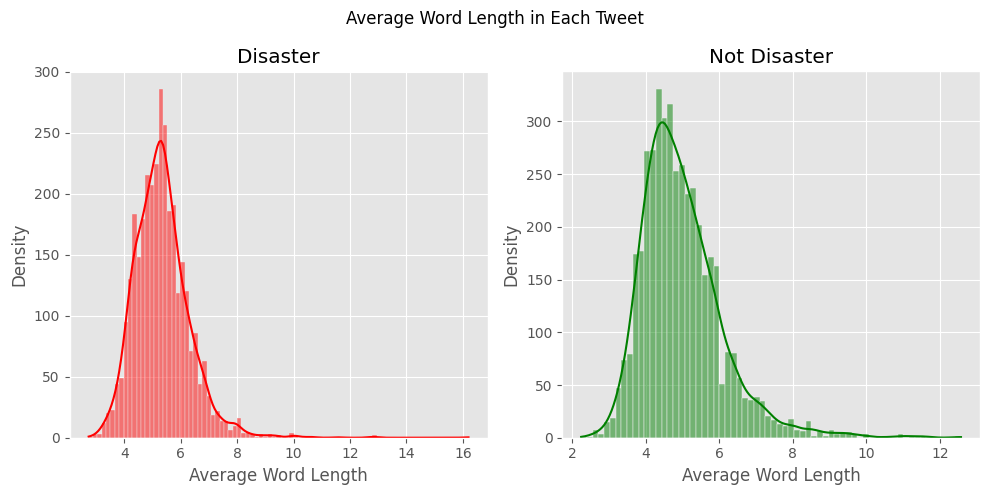

In [22]:
plot_average_word_length_for_each_tweet_histogram(raw=False)

In [23]:
plot_tweet_length_histogram(raw=False)

In [34]:
plot_tweet_word_length_histogram(raw=False)

In [35]:
plot_most_common_keywords(raw=False)

In [36]:
plot_most_common_locations(raw=False)

In [38]:
plot_most_common_words(raw=False, top=100)

In [39]:
plost_most_common_bigrams(raw=False, top=15)

In [40]:
plost_most_common_trigrams(raw=False, top=15)

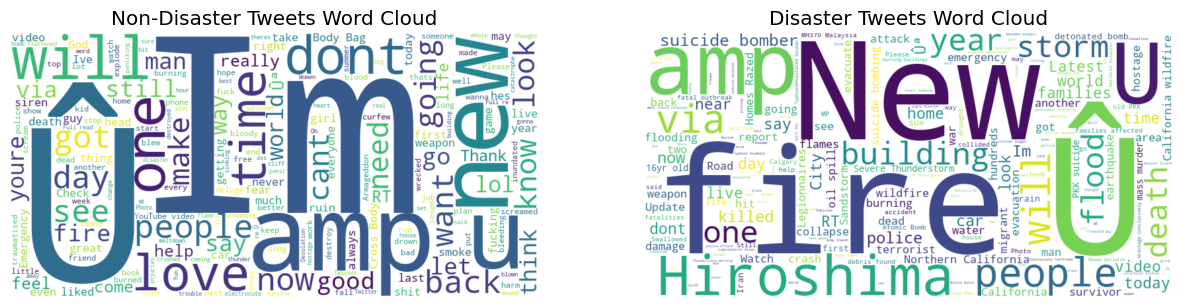

In [41]:
plot_wordcloud(raw=False)

<a id="5"></a> 
#### Conclusion [⏮️](#4)[👆🏽](#0)[⏭️](#6)

<a id="6"></a> 
#### <i>References</i> [⏮️](#5)[👆🏽](#0)[⏭️](#7)

Here is some text with a reference to the [Python documentation](https://docs.python.org/).

...

Here are some references for more information on the libraries used:

- [Pandas documentation](https://pandas.pydata.org/docs/)
- [NumPy documentation](https://numpy.org/doc/stable/)

🍀 Auteurs
- 🧑🏾‍💻 Kikia DIA
- 🧑🏾‍💻 Mouhamadou Naby DIA
- 🧑🏾‍💻 Ndeye Awa SALANE

🍀 Affiliations
- 🎓 Ecole Polytechnique de THIES

🍀 Département 
- 💻 Genie Informatique et Telecoms

🍀 Niveau
- 📚 DIC2